In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Merged_GNSS_and_SNR_HKKT.csv'
gnss_data = pd.read_csv(file_path)

# Convert 'TIME' column to datetime and specify dayfirst=True to handle the format
gnss_data['TIME'] = pd.to_datetime(gnss_data['TIME'], dayfirst=True)
gnss_data['Time_seconds'] = (gnss_data['TIME'] - gnss_data['TIME'].min()).dt.total_seconds()

# Define features (including time) and target variable
features = ['Time_seconds', 'Phase (m)', 'STD of Pseudorange L1 (m)', 'STD of Pseudorange L2 (m)',
            'Elevation', 'Azimuth', 'SNR(dBHz)', 'L1 MP(m)']
target = 'Pseudorange Residual (m)'

# Drop rows with missing values
gnss_data_clean = gnss_data.dropna(subset=features + [target])

# Split data into features (X) and target (y)
X = gnss_data_clean[features]
y = gnss_data_clean[target]

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets, maintaining time-based order
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Random Forest

RMS of Original Pseudorange Residual (M_original): 0.9533 meters
RMS after model prediction (M_m): 0.6925 meters
Improvement Rate: 27.36%


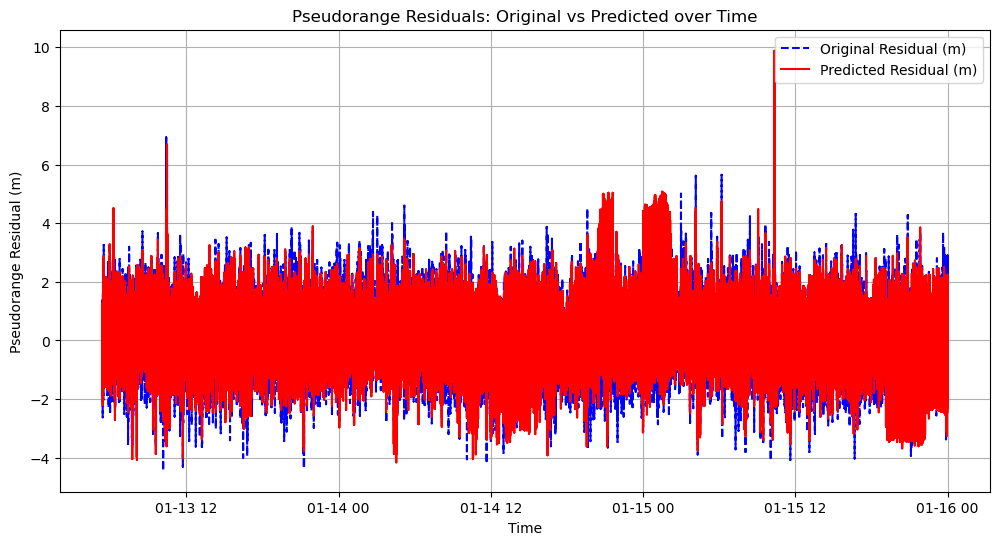

In [17]:
# Initialize and train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict the pseudorange residuals
y_pred = rf_model.predict(X_test)

# Calculate RMS for the original and model-predicted residuals
a1 = np.sqrt(mean_squared_error(y_test, np.zeros_like(y_test)))  # RMS of original data
a2 = np.sqrt(mean_squared_error(y_test, y_pred))  # RMS after model prediction

# Calculate improvement rate
improvement_rate = (a1 - a2) / a1

# Print the results
print(f'RMS of Original Pseudorange Residual (M_original): {a1:.4f} meters')
print(f'RMS after model prediction (M_m): {a2:.4f} meters')
print(f'Improvement Rate: {improvement_rate * 100:.2f}%')

# Plot the comparison between original and predicted residuals over time
plt.figure(figsize=(12, 6))
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_test):], y_test, label='Original Residual (m)', color='blue', linestyle='--')
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_pred):], y_pred, label='Predicted Residual (m)', color='red')
plt.title('Pseudorange Residuals: Original vs Predicted over Time')
plt.xlabel('Time')
plt.ylabel('Pseudorange Residual (m)')
plt.legend()
plt.grid(True)
plt.show()

# FCNN

Epoch 1/50


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9387/9387 ━━━━━━━━━━━━━━━━━━━━ 2s 212us/step - loss: 0.3518
Epoch 2/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 2s 205us/step - loss: 0.3192
Epoch 3/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 2s 207us/step - loss: 0.3159
Epoch 4/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 2s 205us/step - loss: 0.3175
Epoch 5/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 2s 207us/step - loss: 0.3121
Epoch 6/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 2s 205us/step - loss: 0.3104
Epoch 7/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 2s 210us/step - loss: 0.3089
Epoch 8/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 2s 212us/step - loss: 0.3083
Epoch 9/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 2s 208us/step - loss: 0.3075
Epoch 10/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 2s 207us/step - loss: 0.3059
Epoch 11/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 2s 205us/step - loss: 0.3045
Epoch 12/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 2s 207us/step - loss: 0.3042
Epoch 13/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 2s 205us/step - loss: 0.3025
Epoch 14/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 2s 207us/step - loss: 0.3041
Epoch 15/50


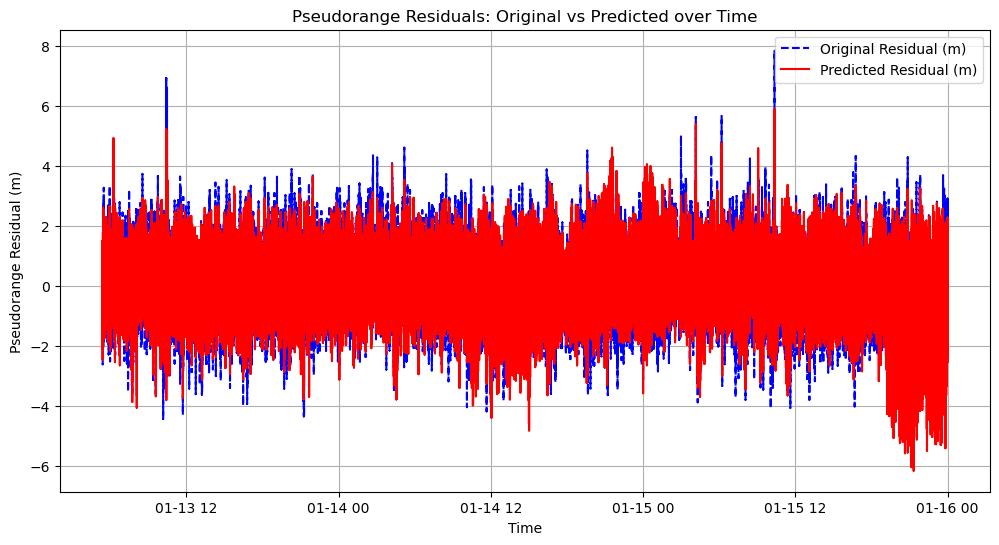

In [3]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define the FCNN model
fcnn_model = Sequential()
fcnn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
fcnn_model.add(Dense(32, activation='relu'))
fcnn_model.add(Dense(1))

# Compile the model
fcnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
fcnn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predicting
y_pred_fcnn = fcnn_model.predict(X_test)

# Calculate RMS for FCNN
a2_fcnn = np.sqrt(mean_squared_error(y_test, y_pred_fcnn))
improvement_rate_fcnn = (a1 - a2_fcnn) / a1

print(f'RMS of FCNN: {a2_fcnn:.4f} meters')
print(f'Improvement Rate: {improvement_rate_fcnn * 100:.2f}%')

# Plotting the comparison between original and predicted residuals over time
plt.figure(figsize=(12, 6))
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_test):], y_test, label='Original Residual (m)', color='blue', linestyle='--')
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_pred_fcnn):], y_pred_fcnn, label='Predicted Residual (m)', color='red')
plt.title('Pseudorange Residuals: Original vs Predicted over Time')
plt.xlabel('Time')
plt.ylabel('Pseudorange Residual (m)')
plt.legend()
plt.grid(True)
plt.show()


# CNN

In [9]:
# Reshape the input data for CNN
X_train_cnn = np.expand_dims(X_train, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)

Epoch 1/50


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9387/9387 ━━━━━━━━━━━━━━━━━━━━ 3s 275us/step - loss: 0.3450
Epoch 2/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 2s 262us/step - loss: 0.3210
Epoch 3/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 2s 256us/step - loss: 0.3154
Epoch 4/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 2s 260us/step - loss: 0.3149
Epoch 5/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 2s 262us/step - loss: 0.3123
Epoch 6/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 2s 261us/step - loss: 0.3119
Epoch 7/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 2s 259us/step - loss: 0.3106
Epoch 8/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 3s 297us/step - loss: 0.3071
Epoch 9/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 3s 268us/step - loss: 0.3090
Epoch 10/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 2s 259us/step - loss: 0.3047
Epoch 11/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 2s 262us/step - loss: 0.3059
Epoch 12/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 2s 260us/step - loss: 0.3048
Epoch 13/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 2s 258us/step - loss: 0.3042
Epoch 14/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 2s 261us/step - loss: 0.3036
Epoch 15/50


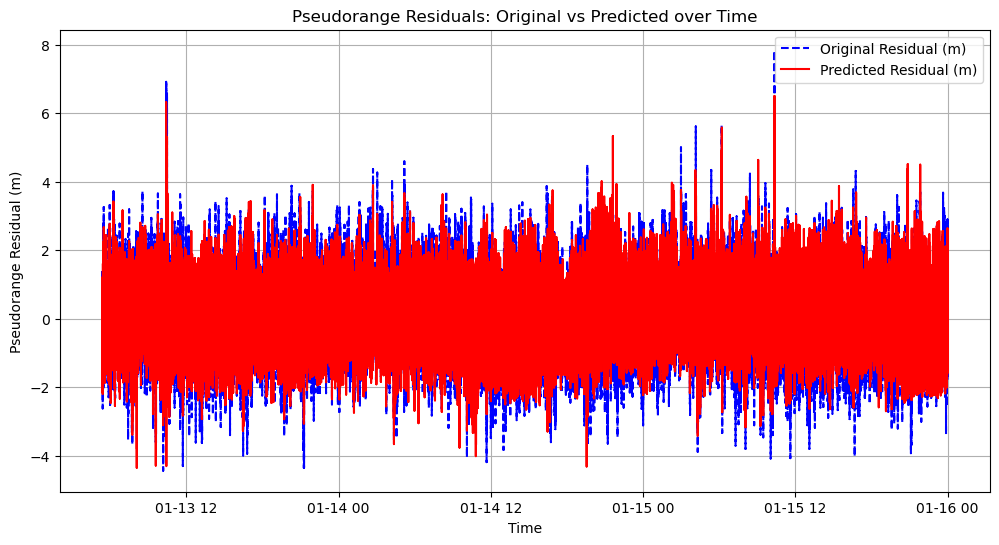

In [10]:
from keras.models import Sequential
from keras.layers import Conv1D, Flatten, Dense
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(1))

# Compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, verbose=1)

# Predicting
y_pred_cnn = cnn_model.predict(X_test_cnn)

# Calculate RMS for CNN
a2_cnn = np.sqrt(mean_squared_error(y_test, y_pred_cnn))
improvement_rate_cnn = (a1 - a2_cnn) / a1

print(f'RMS of CNN: {a2_cnn:.4f} meters')
print(f'Improvement Rate: {improvement_rate_cnn * 100:.2f}%')

# Plotting the comparison between original and predicted residuals over time
plt.figure(figsize=(12, 6))
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_test):], y_test, label='Original Residual (m)', color='blue', linestyle='--')
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_pred_cnn):], y_pred_cnn, label='Predicted Residual (m)', color='red')
plt.title('Pseudorange Residuals: Original vs Predicted over Time')
plt.xlabel('Time')
plt.ylabel('Pseudorange Residual (m)')
plt.legend()
plt.grid(True)
plt.show()


# RNN/LSTM

Epoch 1/50


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9387/9387 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.3579
Epoch 2/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.3213
Epoch 3/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.3167
Epoch 4/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.3133
Epoch 5/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.3088
Epoch 6/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.3056
Epoch 7/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.3045
Epoch 8/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.3018
Epoch 9/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.2953
Epoch 10/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.2926
Epoch 11/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.2881
Epoch 12/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.2861
Epoch 13/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.2852
Epoch 14/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.2796
Epoch 15/50
9387/9387 ━━━━

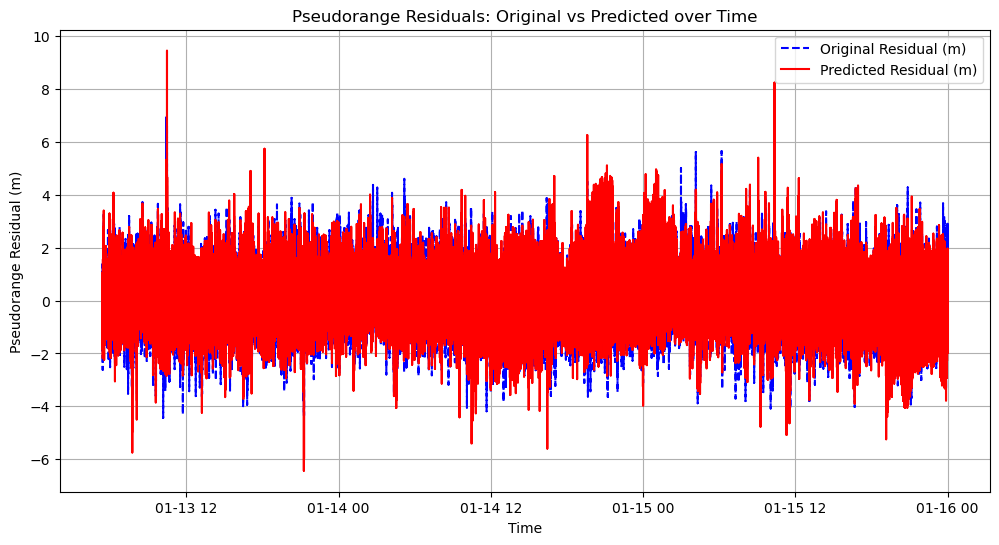

In [5]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Reshape the input data for LSTM
X_train_rnn = np.expand_dims(X_train, axis=2)
X_test_rnn = np.expand_dims(X_test, axis=2)

# Define the LSTM model
rnn_model = Sequential()
rnn_model.add(LSTM(50, return_sequences=True, input_shape=(X_train_rnn.shape[1], 1)))
rnn_model.add(LSTM(50))
rnn_model.add(Dense(1))

# Compile the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, verbose=1)

# Predicting
y_pred_rnn = rnn_model.predict(X_test_rnn)

# Calculate RMS for LSTM
a2_rnn = np.sqrt(mean_squared_error(y_test, y_pred_rnn))
improvement_rate_rnn = (a1 - a2_rnn) / a1

print(f'RMS of LSTM: {a2_rnn:.4f} meters')
print(f'Improvement Rate: {improvement_rate_rnn * 100:.2f}%')

# Plotting the comparison between original and predicted residuals over time
plt.figure(figsize=(12, 6))
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_test):], y_test, label='Original Residual (m)', color='blue', linestyle='--')
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_pred_rnn):], y_pred_rnn, label='Predicted Residual (m)', color='red')
plt.title('Pseudorange Residuals: Original vs Predicted over Time')
plt.xlabel('Time')
plt.ylabel('Pseudorange Residual (m)')
plt.legend()
plt.grid(True)
plt.show()


# Decision Tree Regressor

RMS of Decision Tree: 0.9524 meters
Improvement Rate: 0.09%


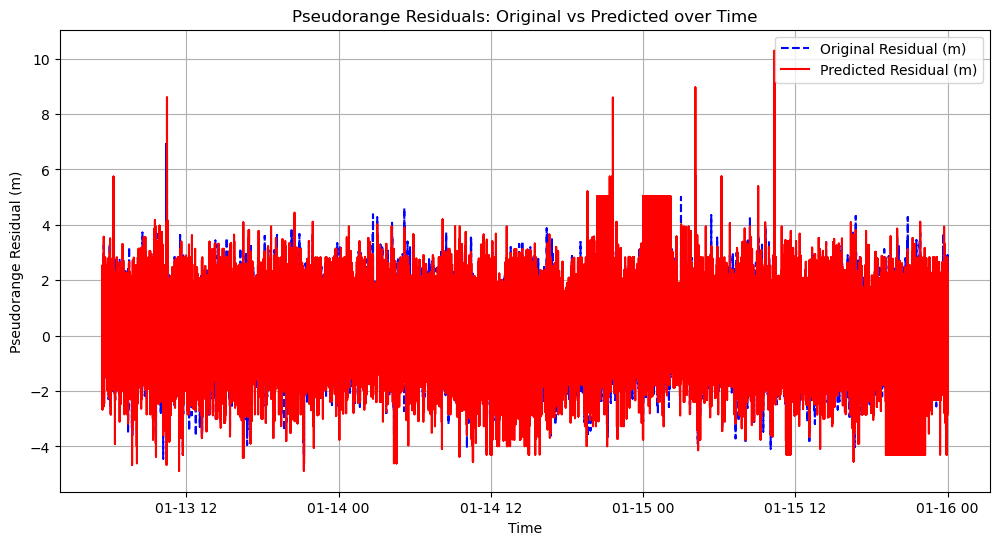

In [6]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predicting
y_pred_dt = dt_model.predict(X_test)

# Calculate RMS for Decision Tree
a2_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
improvement_rate_dt = (a1 - a2_dt) / a1

print(f'RMS of Decision Tree: {a2_dt:.4f} meters')
print(f'Improvement Rate: {improvement_rate_dt * 100:.2f}%')

# Plotting the comparison between original and predicted residuals over time
plt.figure(figsize=(12, 6))
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_test):], y_test, label='Original Residual (m)', color='blue', linestyle='--')
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_pred_dt):], y_pred_dt, label='Predicted Residual (m)', color='red')
plt.title('Pseudorange Residuals: Original vs Predicted over Time')
plt.xlabel('Time')
plt.ylabel('Pseudorange Residual (m)')
plt.legend()
plt.grid(True)
plt.show()


# Linear Regression

RMS of Linear Model: 0.7454 meters
Improvement Rate: 21.80%


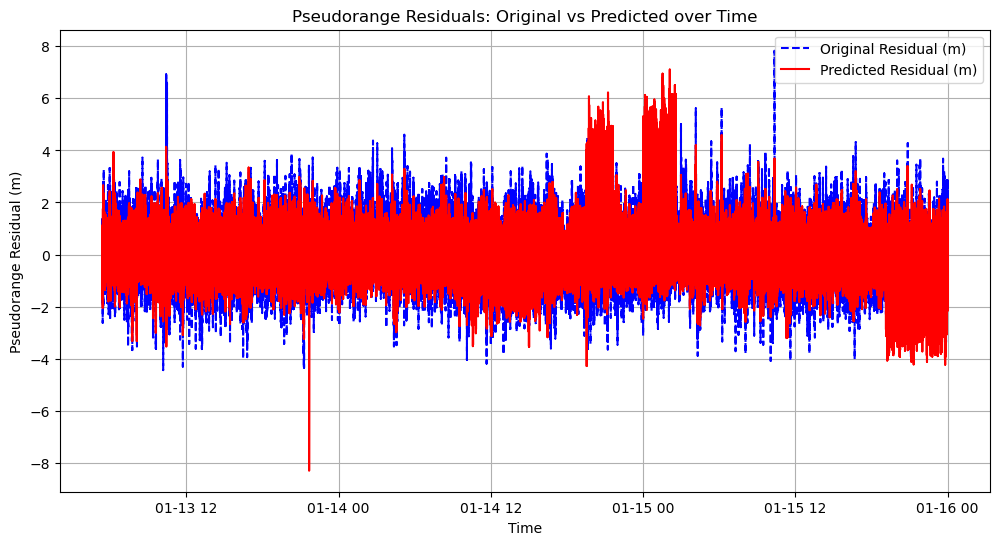

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicting
y_pred_linear = linear_model.predict(X_test)

# Calculate RMS for Linear Model
a2_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
improvement_rate_linear = (a1 - a2_linear) / a1

print(f'RMS of Linear Model: {a2_linear:.4f} meters')
print(f'Improvement Rate: {improvement_rate_linear * 100:.2f}%')

# Plotting the comparison between original and predicted residuals over time
plt.figure(figsize=(12, 6))
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_test):], y_test, label='Original Residual (m)', color='blue', linestyle='--')
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_pred_linear):], y_pred_linear, label='Predicted Residual (m)', color='red')
plt.title('Pseudorange Residuals: Original vs Predicted over Time')
plt.xlabel('Time')
plt.ylabel('Pseudorange Residual (m)')
plt.legend()
plt.grid(True)
plt.show()


# Support Vector Regression (SVR)

RMS of RBF SVR Model (Downsampled): 0.6511 meters
Improvement Rate: 31.69%


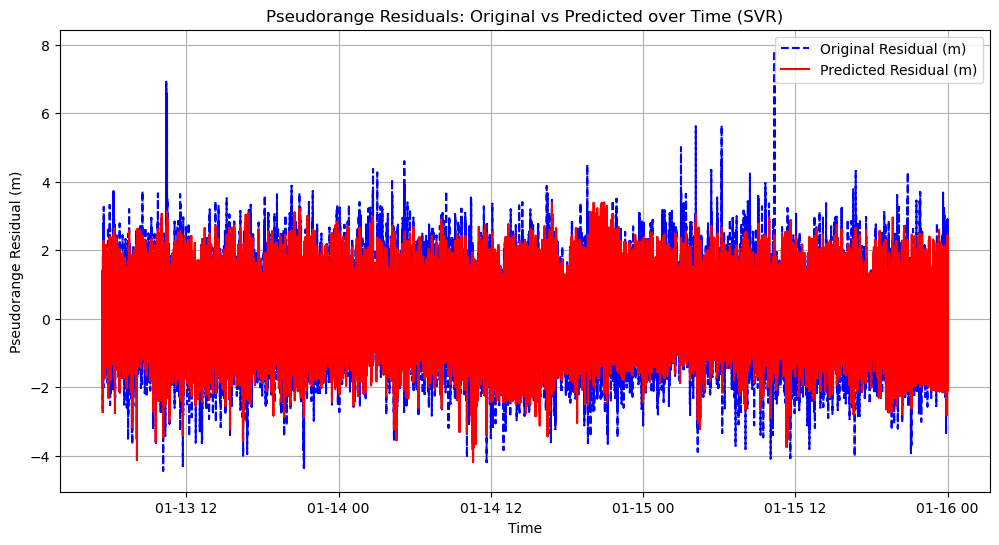

In [8]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
import numpy as np
import matplotlib.pyplot as plt

# Downsample the data (e.g., to 50% of the original data)
X_train_downsampled, y_train_downsampled = resample(X_train, y_train, n_samples=int(len(X_train) * 0.5), random_state=42)

# Scaling the downsampled data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_downsampled)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVR model with 'rbf' kernel
svm_model_rbf = SVR(kernel='rbf', cache_size=200, tol=1e-3)
svm_model_rbf.fit(X_train_scaled, y_train_downsampled)

# Predicting
y_pred_svm_rbf = svm_model_rbf.predict(X_test_scaled)

# Calculate RMS for SVR with RBF kernel
a2_svm_rbf = np.sqrt(mean_squared_error(y_test, y_pred_svm_rbf))
improvement_rate_svm_rbf = (a1 - a2_svm_rbf) / a1

print(f'RMS of RBF SVR Model (Downsampled): {a2_svm_rbf:.4f} meters')
print(f'Improvement Rate: {improvement_rate_svm_rbf * 100:.2f}%')

# Plotting the comparison between original and predicted residuals over time
plt.figure(figsize=(12, 6))
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_test):], y_test, label='Original Residual (m)', color='blue', linestyle='--')
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_pred_svm_rbf):], y_pred_svm_rbf, label='Predicted Residual (m)', color='red')
plt.title('Pseudorange Residuals: Original vs Predicted over Time (SVR)')
plt.xlabel('Time')
plt.ylabel('Pseudorange Residual (m)')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Function to create the CNN model (for KerasRegressor)
def create_cnn(filters=64, kernel_size=2, activation='relu'):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation=activation, input_shape=(X_train_cnn.shape[1], 1)))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Reshape the input data for CNN
X_train_cnn = np.expand_dims(X_train, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)

# Wrap the model using KerasRegressor from scikeras, passing the default values for filters and kernel_size
cnn_model = KerasRegressor(model=create_cnn, verbose=1)

# Define the parameter grid for tuning
param_grid = {
    'model__filters': [32, 64, 128],  # Pass filters as model__filters
    'model__kernel_size': [2, 3, 4],  # Pass kernel_size as model__kernel_size
    'epochs': [10, 20, 50],           # epochs stays the same
    'batch_size': [32, 64],           # batch_size stays the same
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=cnn_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train_cnn, y_train)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best model to predict
best_cnn_model = grid_search.best_estimator_
y_pred_cnn_tuned = best_cnn_model.predict(X_test_cnn)

# Calculate RMS for the tuned CNN model
a2_cnn_tuned = np.sqrt(mean_squared_error(y_test, y_pred_cnn_tuned))
improvement_rate_cnn_tuned = (a1 - a2_cnn_tuned) / a1

print(f'RMS of Tuned CNN: {a2_cnn_tuned:.4f} meters')
print(f'Improvement Rate: {improvement_rate_cnn_tuned * 100:.2f}%')


Fitting 3 folds for each of 54 candidates, totalling 162 fits


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 844us/step - loss: 0.3581
Epoch 2/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 847us/step - loss: 0.3410
Epoch 2/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 845us/step - loss: 0.3566
Epoch 2/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 865us/step - loss: 0.3544
Epoch 2/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 990us/step - loss: 0.3399
Epoch 2/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.37254
Epoch 2/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.37135
Epoch 2/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.365154
Epoch 2/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.33745
5994/6258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3611Epoch 2/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.36045
Epoch 2/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.35637
Epoch 2/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 8s 1

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 729us/step - loss: 0.311
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 850us/step - loss: 0.3128
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 560us/step - loss: 0.318
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 10s 856us/step - loss: 0.3080
 914/3129 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step[CV] END batch_size=32, epochs=10, model__filters=32, model__kernel_size=3; total time= 1.0min
Epoch 1/10
 636/6258 ━━━━━━━━━━━━━━━━━━━━ 4s 872us/step - loss: 0.3837

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 9s 833us/step - loss: 0.3150
Epoch 10/10
 203/6258 ━━━━━━━━━━━━━━━━━━━━ 4s 749us/step - loss: 0.2992[CV] END batch_size=32, epochs=10, model__filters=32, model__kernel_size=3; total time= 1.0min
Epoch 1/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 848us/step - loss: 0.2943
Epoch 10/10


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 773us/step - loss: 0.3118
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 872us/step - loss: 0.3115
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 819us/step - loss: 0.420
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 590us/step - loss: 0.291
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 839us/step - loss: 0.291
1947/6258 ━━━━━━━━━━━━━━━━━━━━ 4s 996us/step - loss: 0.3947[CV] END batch_size=32, epochs=10, model__filters=32, model__kernel_size=2; total time= 1.1min
Epoch 1/10
5006/6258 ━━━━━━━━━━━━━━━━━━━━ 1s 933us/step - loss: 0.3152[CV] END batch_size=32, epochs=10, model__filters=32, model__kernel_size=2; total time= 1.1min
Epoch 1/10
2851/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - loss: 0.290

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 854us/step - loss: 0.318
5332/6258 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - loss: 0.2947

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4248/6258 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - loss: 0.2902[CV] END batch_size=32, epochs=10, model__filters=32, model__kernel_size=4; total time= 1.1min
Epoch 1/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 911us/step - loss: 0.3150
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 897us/step - loss: 0.2947
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 903us/step - loss: 0.3327
Epoch 2/10
5705/6258 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.3608

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 10s 805us/step - loss: 0.2902
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 834us/step - loss: 0.2946
6055/6258 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 0.3127[CV] END batch_size=32, epochs=10, model__filters=32, model__kernel_size=4; total time= 1.1min
Epoch 1/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 903us/step - loss: 0.3127
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 878us/step - loss: 0.3589
Epoch 2/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 792us/step44 loss: 0.308
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 949us/step - loss: 0.3638
Epoch 2/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 784us/step - loss: 0.384
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 671us/step - loss: 0.327
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 763us/step - loss: 0.371
3416/6258 ━━━━━━━━━━━━━━━━━━━━ 2s 910us/step - loss: 0.3081[CV] END batch_size=32, epochs=10, model__filters=64, model__kernel_size=2; total time= 1.1min
Epoch 1/10
4299/6258 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step - loss: 0.3639

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 798us/step - loss: 0.352
2481/6258 ━━━━━━━━━━━━━━━━━━━━ 3s 917us/step - loss: 0.3540[CV] END batch_size=32, epochs=10, model__filters=32, model__kernel_size=2; total time= 1.1min
Epoch 1/10


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5216/6258 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.3664[CV] END batch_size=32, epochs=10, model__filters=32, model__kernel_size=4; total time= 1.2min
Epoch 1/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 799us/step - loss: 0.3620
5812/6258 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - loss: 0.3459Epoch 2/10
1178/6258 ━━━━━━━━━━━━━━━━━━━━ 3s 784us/step - loss: 0.4015[CV] END batch_size=32, epochs=10, model__filters=64, model__kernel_size=2; total time= 1.2min
Epoch 1/10
5868/6258 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - loss: 0.3582

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6127/6258 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 0.3576[CV] END batch_size=32, epochs=10, model__filters=64, model__kernel_size=2; total time= 1.2min
Epoch 1/10


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 915us/step - loss: 0.3443
Epoch 2/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 850us/step - loss: 0.3572
 523/6258 ━━━━━━━━━━━━━━━━━━━━ 4s 870us/step - loss: 0.3109Epoch 2/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 889us/step - loss: 0.3074
Epoch 3/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 926us/step - loss: 0.3267
Epoch 3/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 977us/step - loss: 0.3357
Epoch 2/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 935us/step - loss: 0.3273
Epoch 3/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 993us/step - loss: 0.3255
Epoch 3/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 920us/step - loss: 0.3281
Epoch 3/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.35840
3776/6258 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3230Epoch 2/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 979us/step - loss: 0.3100
Epoch 3/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.3358
Epoch 2/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.3644
Epoch 2/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 852/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 960us/step[CV] END batch_size=32, epochs=10, model__filters=64, model__kernel_size=3; total time= 1.2min
Epoch 1/10
2663/6258 ━━━━━━━━━━━━━━━━━━━━ 3s 987us/step - loss: 0.3084[CV] END batch_size=32, epochs=10, model__filters=64, model__kernel_size=4; total time= 1.1min
Epoch 1/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 841us/step loss: 0.31314
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.31185
1698/6258 ━━━━━━━━━━━━━━━━━━━━ 3s 838us/step - loss: 0.2954Epoch 9/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 908us/step - loss: 0.316
2728/6258 ━━━━━━━━━━━━━━━━━━━━ 3s 889us/step - loss: 0.3156

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3416/6258 ━━━━━━━━━━━━━━━━━━━━ 2s 873us/step - loss: 0.2955[CV] END batch_size=32, epochs=10, model__filters=64, model__kernel_size=3; total time= 1.2min
Epoch 1/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 957us/step - loss: 0.295
 683/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 968us/step - loss: 0.3225[CV] END batch_size=32, epochs=10, model__filters=64, model__kernel_size=4; total time= 1.1min
Epoch 1/20
2565/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: 0.317

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4879/6258 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step - loss: 0.3106[CV] END batch_size=32, epochs=10, model__filters=64, model__kernel_size=3; total time= 1.2min
Epoch 1/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 894us/step54 loss: 0.314


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 913us/step - loss: 0.3112
 356/6258 ━━━━━━━━━━━━━━━━━━━━ 3s 568us/step - loss: 0.3061Epoch 10/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 873us/step - loss: 0.2953
Epoch 10/10
2915/6258 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.37093

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3322/6258 ━━━━━━━━━━━━━━━━━━━━ 2s 915us/step - loss: 0.3490[CV] END batch_size=32, epochs=10, model__filters=64, model__kernel_size=4; total time= 1.2min
Epoch 1/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 938us/step - loss: 0.3136
Epoch 10/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 929us/step - loss: 0.2964
Epoch 10/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 974us/step - loss: 0.3106
Epoch 10/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 960us/step - loss: 0.3374
Epoch 2/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.35524
Epoch 2/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 945us/step - loss: 0.3595
Epoch 2/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 951us/step - loss: 0.3416
Epoch 2/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 923us/step - loss: 0.3576
Epoch 2/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.3113
5136/6258 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step - loss: 0.3663Epoch 10/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.31253
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 932us/step - loss: 0.3622
Epoch 2/20
6258/

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 194/6258 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2867[CV] END batch_size=32, epochs=10, model__filters=128, model__kernel_size=2; total time= 1.3min
Epoch 1/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 938us/step loss: 0.30323
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.32802
Epoch 3/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 914us/step - loss: 0.3275
Epoch 3/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 884us/step loss: 0.29198
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 0.2936
  71/6258 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.7261[CV] END batch_size=32, epochs=10, model__filters=128, model__kernel_size=3; total time= 1.3min
Epoch 1/20
1613/6258 ━━━━━━━━━━━━━━━━━━━━ 4s 916us/step - loss: 0.3007

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1024/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.32416

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 609/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 886us/step - loss: 0.4599[CV] END batch_size=32, epochs=10, model__filters=128, model__kernel_size=2; total time= 1.3min
Epoch 1/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.311739
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 815us/step - loss: 0.309
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 964us/step - loss: 0.3293
Epoch 3/20
 831/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3285[CV] END batch_size=32, epochs=10, model__filters=128, model__kernel_size=3; total time= 1.3min
Epoch 1/20
3954/6258 ━━━━━━━━━━━━━━━━━━━━ 2s 932us/step - loss: 0.3217

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 935us/step - loss: 0.321
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 783us/step - loss: 0.377
5113/6258 ━━━━━━━━━━━━━━━━━━━━ 1s 952us/step - loss: 0.3218[CV] END batch_size=32, epochs=10, model__filters=128, model__kernel_size=3; total time= 1.3min
Epoch 1/20
5448/6258 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.3036

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3505/6258 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step - loss: 0.3857

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4885/6258 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step - loss: 0.3549[CV] END batch_size=32, epochs=10, model__filters=128, model__kernel_size=2; total time= 1.4min
Epoch 1/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 999us/step - loss: 0.3036
Epoch 4/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 932us/step - loss: 0.3033
Epoch 4/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 968us/step - loss: 0.3219
Epoch 4/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 898us/step - loss: 0.3227
Epoch 4/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.323244
Epoch 4/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 927us/step - loss: 0.3486
Epoch 2/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 920us/step - loss: 0.3556
4933/6258 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 0.3495Epoch 2/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 873us/step - loss: 0.3690
Epoch 2/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 939us/step - loss: 0.3262
Epoch 4/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 772us/step - loss: 0.3439
Epoch 2/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 864us/step - loss: 0.3025
Epoch

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

 473/6258 ━━━━━━━━━━━━━━━━━━━━ 4s 858us/step - loss: 0.3087[CV] END batch_size=32, epochs=10, model__filters=128, model__kernel_size=4; total time= 1.2min
Epoch 1/20
[CV] END batch_size=32, epochs=10, model__filters=128, model__kernel_size=4; total time= 1.1min
Epoch 1/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 875us/step - loss: 0.3122
Epoch 10/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 841us/step - loss: 0.3143
Epoch 9/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 840us/step - loss: 0.2939
Epoch 10/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 818us/step - loss: 0.3139
Epoch 9/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 867us/step - loss: 0.3135
Epoch 12/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 768us/step - loss: 0.3115
3433/6258 ━━━━━━━━━━━━━━━━━━━━ 2s 980us/step - loss: 0.3457Epoch 11/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 917us/step - loss: 0.2938
Epoch 10/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 906us/step - loss: 0.3105
Epoch 13/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 10s 837us/step - loss: 0.2919
Epoch 12/20
6258/6258 ━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4043/6258 ━━━━━━━━━━━━━━━━━━━━ 2s 913us/step - loss: 0.3078[CV] END batch_size=32, epochs=20, model__filters=32, model__kernel_size=2; total time= 2.1min
Epoch 1/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 968us/step - loss: 0.2912
Epoch 10/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 751us/step loss: 0.303058
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 969us/step - loss: 0.3008
Epoch 20/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.31309
Epoch 11/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 9s 897us/step - loss: 0.3059
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.3148
Epoch 10/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 941us/step - loss: 0.3073
Epoch 18/20
 531/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 967us/step - loss: 0.3046

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1801/6258 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2909[CV] END batch_size=32, epochs=20, model__filters=32, model__kernel_size=2; total time= 2.2min
Epoch 1/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 956us/step - loss: 0.3053
Epoch 20/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 984us/step - loss: 0.2869
Epoch 20/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 800us/step loss: 0.293062
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 968us/step - loss: 0.2840
Epoch 20/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 992us/step - loss: 0.3061
Epoch 19/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 978us/step - loss: 0.2907
Epoch 11/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 929us/step - loss: 0.3012
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 956us/step - loss: 0.3432
Epoch 2/20
3035/6258 ━━━━━━━━━━━━━━━━━━━━ 2s 854us/step - loss: 0.2871[CV] END batch_size=32, epochs=20, model__filters=32, model__kernel_size=2; total time= 2.2min
Epoch 1/20
2667/6258 ━━━━━━━━━━━━━━━━━━━━ 2s 819us/step - loss: 0.3026

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 927us/step - loss: 0.3112
Epoch 12/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 964us/step - loss: 0.3131
Epoch 11/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 987us/step - loss: 0.3058
Epoch 19/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 988us/step - loss: 0.3038
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 915us/step - loss: 0.2846
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 968us/step - loss: 0.3531
1127/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3060  Epoch 2/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 873us/step - loss: 0.292
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 943us/step - loss: 0.2858
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 922us/step - loss: 0.3050
Epoch 20/20
4096/6258 ━━━━━━━━━━━━━━━━━━━━ 1s 889us/step - loss: 0.3112[CV] END batch_size=32, epochs=20, model__filters=32, model__kernel_size=3; total time= 2.1min
Epoch 1/20
 713/6258 ━━━━━━━━━━━━━━━━━━━━ 4s 760us/step - loss: 0.3123

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 849us/step - loss: 0.311
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 788us/step loss: 0.36887
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 872us/step - loss: 0.2915
Epoch 12/20
5506/6258 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 0.3110

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1947/6258 ━━━━━━━━━━━━━━━━━━━━ 3s 822us/step - loss: 0.3077[CV] END batch_size=32, epochs=20, model__filters=32, model__kernel_size=3; total time= 2.1min
Epoch 1/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 983us/step - loss: 0.3065
Epoch 3/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 873us/step - loss: 0.3109
Epoch 13/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 902us/step - loss: 0.365
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 899us/step - loss: 0.3117
Epoch 12/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 943us/step - loss: 0.3606
Epoch 2/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 903us/step - loss: 0.3057
Epoch 20/20
2131/6258 ━━━━━━━━━━━━━━━━━━━━ 3s 796us/step - loss: 0.3047[CV] END batch_size=32, epochs=20, model__filters=32, model__kernel_size=3; total time= 2.2min
Epoch 1/20
 722/6258 ━━━━━━━━━━━━━━━━━━━━ 4s 841us/step - loss: 0.4435[CV] END batch_size=32, epochs=20, model__filters=32, model__kernel_size=4; total time= 2.1min
Epoch 1/20
1434/6258 ━━━━━━━━━━━━━━━━━━━━ 4s 835us/step - loss: 0.3079

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 918us/step - loss: 0.3253
Epoch 3/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 819us/step - loss: 0.3057
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 927us/step - loss: 0.3426
Epoch 2/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 933us/step - loss: 0.2894
Epoch 13/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 769us/step loss: 0.27306
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 976us/step - loss: 0.3067
Epoch 14/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 990us/step - loss: 0.3017
Epoch 4/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 888us/step - loss: 0.3035
  81/3129 ━━━━━━━━━━━━━━━━━━━━ 1s 625us/step [CV] END batch_size=32, epochs=20, model__filters=32, model__kernel_size=4; total time= 2.2min
Epoch 1/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 960us/step - loss: 0.3103
Epoch 13/20
2414/6258 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.34906

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 8s 938us/step - loss: 0.3594
Epoch 2/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.32971
Epoch 3/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 577us/step loss: 0.36300
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.32070
Epoch 4/20
4438/6258 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3393[CV] END batch_size=32, epochs=20, model__filters=32, model__kernel_size=4; total time= 2.2min
Epoch 1/20
3980/6258 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.28590

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 8s 985us/step - loss: 0.3613
Epoch 2/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.33429
Epoch 2/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 922us/step - loss: 0.3079
Epoch 3/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.28650
Epoch 14/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 911us/step - loss: 0.3005
Epoch 5/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 944us/step - loss: 0.3081
Epoch 15/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.309847
Epoch 14/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.32440
Epoch 4/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.35123
Epoch 2/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.31716
Epoch 5/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.32636
4116/6258 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2848Epoch 3/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.36546
Epoch 2/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.30466
Epoch 4/20
6258/6258 ━━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 9s 981us/step - loss: 0.3114
Epoch 10/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.28090
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.3114 9
Epoch 9/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.3107
Epoch 9/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3163 
Epoch 8/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.3150
Epoch 8/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2910
4008/6258 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2915Epoch 12/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.3066
Epoch 12/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2964
Epoch 9/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 863us/step 0.22: 0.3110
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.30722
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.29194
Epoch 11/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 941us/step - loss: 0.3092
Epoch 11/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.339222
Epo

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 909us/step - loss: 0.3086
Epoch 10/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 839us/step - loss: 0.311
4950/6258 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.31369 

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1469/6258 ━━━━━━━━━━━━━━━━━━━━ 3s 791us/step - loss: 0.2910[CV] END batch_size=32, epochs=20, model__filters=64, model__kernel_size=2; total time= 2.3min
Epoch 1/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 974us/step - loss: 0.3117
Epoch 10/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 931us/step - loss: 0.3063
Epoch 13/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.31430
Epoch 9/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3138 
Epoch 9/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.29321
Epoch 10/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.29100
Epoch 12/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.30722
Epoch 12/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.30990
Epoch 3/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 10s 985us/step - loss: 0.2900
Epoch 13/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.35341
Epoch 2/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.31011
Epoch 11/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 988us/step - loss: 0

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1998/6258 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2885[CV] END batch_size=32, epochs=20, model__filters=64, model__kernel_size=3; total time= 2.3min
Epoch 1/20
6115/6258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2923[CV] END batch_size=32, epochs=20, model__filters=64, model__kernel_size=3; total time= 2.4min
Epoch 1/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.30302
Epoch 17/20
4175/6258 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.31263

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.292335
Epoch 11/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.3025
Epoch 20/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3119
5360/6258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2866Epoch 10/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3044
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2897
Epoch 18/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2865
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3090
Epoch 18/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3095
Epoch 11/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3027
Epoch 20/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 834us/step loss: 0.303
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 722us/step loss: 0.31
5205/6258 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3405[CV] END batch_size=32, epochs=20, model__filters=64, model__kernel_size=3; total time= 2.4min
Epoch 1/20
 578/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 966us/step - loss: 0.3076

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 787/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 965us/step - loss: 0.3051[CV] END batch_size=32, epochs=20, model__filters=64, model__kernel_size=4; total time= 2.3min
Epoch 1/50


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.29162
1470/6258 ━━━━━━━━━━━━━━━━━━━━ 4s 930us/step - loss: 0.3024Epoch 12/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.3374
Epoch 2/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.3064 
Epoch 18/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.35635
Epoch 2/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.30346
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.31175
Epoch 11/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.29144
Epoch 19/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.30730
Epoch 19/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 985us/step - loss: 0.3007
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 997us/step loss: 0.33006
5920/6258 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 0.3474[CV] END batch_size=32, epochs=20, model__filters=64, model__kernel_size=4; total time= 2.4min
Epoch 1/50
5961/6258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3472  

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 995us/step - loss: 0.3461
Epoch 2/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.3582
Epoch 2/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.29119
Epoch 13/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.30889
Epoch 3/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.32961
Epoch 3/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 965us/step loss: 0.30312
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.30382
Epoch 19/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.3117
Epoch 12/20
1094/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.32702

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1690/6258 ━━━━━━━━━━━━━━━━━━━━ 4s 954us/step - loss: 0.3856[CV] END batch_size=32, epochs=20, model__filters=64, model__kernel_size=4; total time= 2.4min
Epoch 1/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.31092
Epoch 12/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2880
Epoch 20/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.30681
1677/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3031Epoch 20/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 936us/step - loss: 0.3108
Epoch 3/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 985us/step - loss: 0.3565
Epoch 2/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.32619
Epoch 3/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3040
Epoch 4/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2906
Epoch 14/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.32250
Epoch 4/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.3070
Epoch 20/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3068
Epoch 13/20
6258/

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/stepep - loss: 0.295
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.30904
Epoch 14/20
2746/6258 ━━━━━━━━━━━━━━━━━━━━ 3s 995us/step - loss: 0.2902

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2238/6258 ━━━━━━━━━━━━━━━━━━━━ 3s 805us/step - loss: 0.3018[CV] END batch_size=32, epochs=20, model__filters=128, model__kernel_size=2; total time= 2.6min
Epoch 1/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 882us/step - loss: 0.3244
Epoch 4/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 9s 992us/step - loss: 0.3067
Epoch 14/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/stepep - loss: 0.326
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 975us/step - loss: 0.2981
Epoch 6/20
1232/6258 ━━━━━━━━━━━━━━━━━━━━ 4s 952us/step - loss: 0.4123

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4403/6258 ━━━━━━━━━━━━━━━━━━━━ 1s 922us/step - loss: 0.3483[CV] END batch_size=32, epochs=20, model__filters=128, model__kernel_size=2; total time= 2.6min
Epoch 1/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 992us/step - loss: 0.3152
Epoch 6/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.31807
Epoch 5/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.28915
Epoch 16/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 10s 876us/step - loss: 0.3017
Epoch 5/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 937us/step - loss: 0.3255
 113/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 909us/step - loss: 0.3142Epoch 4/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 918us/step - loss: 0.3411
Epoch 2/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 966us/step - loss: 0.3067
Epoch 15/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 874us/step - loss: 0.3234
Epoch 5/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 8s 942us/step - loss: 0.3562
Epoch 2/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 817us/step - loss: 0.3215
Epoch 5/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 954us/step - loss: 0.3158
Epoc

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 927us/step - loss: 0.3158
Epoch 11/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.31588
Epoch 8/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.30782
Epoch 11/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.30190
Epoch 20/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 10s 860us/step - loss: 0.2978
Epoch 8/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3047 
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 986us/step - loss: 0.3105
Epoch 11/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.29013
Epoch 13/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.31547
Epoch 8/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 917us/step - loss: 0.2921
Epoch 12/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 929us/step - loss: 0.290
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 965us/step - loss: 0.3083
Epoch 13/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 888us/step - loss: 0.3127
1457/6258 ━━━━━━━━━━━━━━━━━━━━ 3s 774us/step - loss: 0.3002Epoch 12/50
 416/6258 ━━━━━━━━━━━━━━━━━━━━ 4s 731u

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 916us/step - loss: 0.3145
Epoch 9/50
 492/6258 ━━━━━━━━━━━━━━━━━━━━ 4s 720us/step - loss: 0.3112[CV] END batch_size=32, epochs=20, model__filters=128, model__kernel_size=3; total time= 2.5min
Epoch 1/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.30614
Epoch 12/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 898us/step - loss: 0.3399
Epoch 2/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 933us/step - loss: 0.2976
Epoch 9/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 902us/step - loss: 0.3097
Epoch 12/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 950us/step - loss: 0.3125
Epoch 9/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 937us/step - loss: 0.2920
Epoch 13/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.3018
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 983us/step - loss: 0.3129
Epoch 13/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.30740 
4243/6258 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step - loss: 0.2919Epoch 14/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 985us/step - loss: 0.3122
Epoch 10/50
6

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 944us/step - loss: 0.3126
Epoch 14/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 898us/step - loss: 0.3145
5094/6258 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - loss: 0.3275Epoch 11/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.30427
Epoch 15/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 922us/step - loss: 0.3019
Epoch 4/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 952us/step - loss: 0.3273
Epoch 3/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 938us/step - loss: 0.2935
Epoch 11/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 998us/step - loss: 0.3050
Epoch 14/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 893us/step - loss: 0.3105
Epoch 14/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 897us/step - loss: 0.3113
Epoch 11/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 915us/step - loss: 0.2922
Epoch 15/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 891us/step - loss: 0.3719
Epoch 2/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 9s 922us/step - loss: 0.2889
Epoch 15/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 818us/step - loss: 0.3097
Epoch 15/50
6258/6258

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 910us/step - loss: 0.2986
Epoch 20/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 850us/step - loss: 0.3162
Epoch 9/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 738us/step - loss: 0.3076
Epoch 23/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 10s 783us/step - loss: 0.3053
Epoch 19/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 774us/step - loss: 0.3104
Epoch 10/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 748us/step - loss: 0.2862
Epoch 22/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 848us/step - loss: 0.3019
Epoch 22/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 881us/step - loss: 0.2903
Epoch 19/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 989us/step - loss: 0.2966
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 971us/step - loss: 0.3348
Epoch 2/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 956us/step - loss: 0.3516
Epoch 2/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 944us/step - loss: 0.3120
Epoch 10/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 913us/step - loss: 0.3051
Epoch 24/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 11s 931us/step - loss: 0.3047
5145/6258 ━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 872us/step - loss: 0.3125
Epoch 12/50
3992/6258 ━━━━━━━━━━━━━━━━━━━━ 2s 948us/step - loss: 0.2878[CV] END batch_size=32, epochs=20, model__filters=128, model__kernel_size=4; total time= 2.5min
Epoch 1/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 958us/step - loss: 0.3045
Epoch 20/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 848us/step - loss: 0.3044
Epoch 21/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 993us/step - loss: 0.2904
Epoch 13/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 972us/step - loss: 0.2839
2895/6258 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3195Epoch 24/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 11s 950us/step - loss: 0.2875
Epoch 20/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 928us/step - loss: 0.3051
Epoch 24/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 922us/step - loss: 0.3066
Epoch 4/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 919us/step - loss: 0.3210
Epoch 4/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 926us/step - loss: 0.3109
Epoch 12/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 828us/step - loss: 0.306

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.29258
Epoch 47/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 952us/step - loss: 0.2986
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2956
Epoch 37/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.29701
Epoch 37/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.27805
Epoch 46/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 917us/step loss: 0.28297
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3014
Epoch 26/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.29577
Epoch 50/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.298420
Epoch 46/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.29883 
Epoch 29/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.28463
4060/6258 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2994Epoch 28/50
4674/6258 ━━━━━━━━━━━━━━━━━━━━ 1s 994us/step - loss: 0.2969

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4781/6258 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2990[CV] END batch_size=32, epochs=50, model__filters=32, model__kernel_size=2; total time= 5.2min
Epoch 1/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 970us/step - loss: 0.2780
Epoch 38/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.29824
Epoch 48/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.296785
Epoch 38/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.341988
Epoch 2/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 967us/step - loss: 0.2942
Epoch 38/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 947us/step - loss: 0.2783
Epoch 47/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 956us/step - loss: 0.2933
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.30134
Epoch 27/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 952us/step - loss: 0.2968
Epoch 47/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.29856
Epoch 30/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.28116
Epoch 29/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 880us/step - loss: 0.2781
17

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 925us/step - loss: 0.2794
Epoch 48/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 962us/step - loss: 0.2993
Epoch 48/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 986us/step - loss: 0.3004
Epoch 28/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 952us/step - loss: 0.2984
Epoch 31/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 933us/step - loss: 0.2843
Epoch 30/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 10s 863us/step - loss: 0.2947
Epoch 39/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 906us/step - loss: 0.2746
Epoch 40/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 890us/step - loss: 0.2962
Epoch 40/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 933us/step - loss: 0.3297
Epoch 3/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 960us/step - loss: 0.2950
Epoch 50/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 889us/step - loss: 0.3630
Epoch 2/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 956us/step - loss: 0.2778
Epoch 49/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 955us/step - loss: 0.2956
Epoch 49/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.29904
Epoch 

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.29840
Epoch 33/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 932us/step - loss: 0.2952
Epoch 42/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.30100
 967/6258 ━━━━━━━━━━━━━━━━━━━━ 4s 892us/step - loss: 0.2986Epoch 5/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 844us/step - loss: 0.2775
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.32176
Epoch 5/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 948us/step - loss: 0.3257
Epoch 4/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 937us/step - loss: 0.2824
Epoch 32/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 872us/step loss: 0.31401
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 969us/step - loss: 0.2972
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 967us/step - loss: 0.3011
Epoch 31/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 919us/step - loss: 0.2960
Epoch 43/50
5111/6258 ━━━━━━━━━━━━━━━━━━━━ 1s 969us/step - loss: 0.3007[CV] END batch_size=32, epochs=50, model__filters=32, model__kernel_size=3; total time= 5.4min
Epoch 1/50
5578/6258 ━━━━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 953us/step - loss: 0.2798
Epoch 43/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 998us/step - loss: 0.2979
Epoch 34/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 935us/step - loss: 0.3399
Epoch 2/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 932us/step - loss: 0.3006
Epoch 6/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 559us/step - loss: 0.290
1042/6258 ━━━━━━━━━━━━━━━━━━━━ 4s 776us/step - loss: 0.2958[CV] END batch_size=32, epochs=50, model__filters=32, model__kernel_size=3; total time= 5.4min
Epoch 1/50
1567/6258 ━━━━━━━━━━━━━━━━━━━━ 4s 939us/step - loss: 0.2979

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 929us/step - loss: 0.3161
Epoch 6/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 867us/step - loss: 0.3205
Epoch 5/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 10s 879us/step - loss: 0.2963
Epoch 42/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 824us/step - loss: 0.2837
Epoch 33/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 779us/step - loss: 0.2950
Epoch 44/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 908us/step - loss: 0.3563
3975/6258 ━━━━━━━━━━━━━━━━━━━━ 2s 970us/step - loss: 0.3179Epoch 2/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 907us/step - loss: 0.3057
Epoch 3/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.29863
Epoch 35/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 954us/step - loss: 0.2985
Epoch 7/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 955us/step - loss: 0.3623
Epoch 2/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3138
Epoch 7/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.31828
Epoch 6/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 932us/step - loss: 0.2937
 457/6258 ━━━━━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1159/6258 ━━━━━━━━━━━━━━━━━━━━ 4s 873us/step - loss: 0.2727[CV] END batch_size=32, epochs=50, model__filters=32, model__kernel_size=4; total time= 5.5min
Epoch 1/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.311696
Epoch 9/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 956us/step - loss: 0.2973
Epoch 43/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.30870
Epoch 15/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.29960
Epoch 39/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 919us/step - loss: 0.3107
Epoch 13/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 890us/step - loss: 0.2737
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 952us/step - loss: 0.2894
Epoch 15/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 956us/step - loss: 0.3111
Epoch 11/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 931us/step - loss: 0.2891
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 971us/step - loss: 0.2796
Epoch 42/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 902us/step - loss: 0.3111
Epoch 10/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 899us/step loss: 0.33294
6258/6258 ━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5604/6258 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 0.2966[CV] END batch_size=32, epochs=50, model__filters=32, model__kernel_size=4; total time= 5.4min
Epoch 1/50
[CV] END batch_size=32, epochs=50, model__filters=32, model__kernel_size=4; total time= 5.7min
Epoch 1/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 775us/step - loss: 0.2967
Epoch 40/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 865us/step - loss: 0.3052
Epoch 16/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 813us/step - loss: 0.3081
Epoch 14/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 843us/step - loss: 0.2888
Epoch 16/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 863us/step - loss: 0.2810
Epoch 43/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 883us/step - loss: 0.3093
Epoch 11/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 10s 869us/step - loss: 0.2968
Epoch 44/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 961us/step - loss: 0.2933
Epoch 12/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2968
Epoch 41/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.3090
Epoch 12/50
6258/6258 ━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.28551
Epoch 20/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.30298
Epoch 22/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.29705
Epoch 49/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.27662
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.3138
3778/6258 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3026Epoch 9/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3021 
Epoch 24/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2832
Epoch 25/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.31617
Epoch 9/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.29148
Epoch 10/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.30359
Epoch 20/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.303093
Epoch 20/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.30003
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.28524
Epoch 21/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - lo

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3011
Epoch 23/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2968
Epoch 50/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2824
Epoch 26/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3011
Epoch 25/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3120
Epoch 10/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 987us/step - loss: 0.3012
Epoch 21/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3113
Epoch 10/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2936
Epoch 11/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.30373
Epoch 21/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2833
Epoch 22/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3004
Epoch 24/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.30781
Epoch 3/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2977 
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2995
4830/6258 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/st

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2283/6258 ━━━━━━━━━━━━━━━━━━━━ 3s 954us/step - loss: 0.3007[CV] END batch_size=32, epochs=50, model__filters=64, model__kernel_size=2; total time= 5.7min
Epoch 1/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.30094
Epoch 25/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.30450
Epoch 4/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.28394
Epoch 28/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.30321
Epoch 27/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.32532
Epoch 3/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.31191
1949/6258 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3011Epoch 12/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.30031
2634/6258 ━━━━━━━━━━━━━━━━━━━━ 3s 983us/step - loss: 0.3027Epoch 23/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 958us/step - loss: 0.2814
Epoch 24/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3140
Epoch 12/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2914
Epoch 13/50
6258/6258 ━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 10s 966us/step - loss: 0.2943
Epoch 46/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2903
Epoch 48/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.29576
Epoch 35/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.27727
3368/6258 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2909Epoch 36/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.29388
5188/6258 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3014Epoch 49/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.28038
Epoch 26/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2990
Epoch 26/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3013 
Epoch 34/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2739
4183/6258 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2941Epoch 48/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3011
Epoch 24/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.29172
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.3357
Epoc

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 214/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3024[CV] END batch_size=32, epochs=50, model__filters=64, model__kernel_size=3; total time= 5.8min
Epoch 1/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2993
Epoch 35/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.27417
Epoch 49/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.29918
Epoch 25/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.29396
Epoch 48/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.30996
Epoch 3/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 968us/step - loss: 0.2893
Epoch 50/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2922
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2812
Epoch 38/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2930
Epoch 37/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.28126
Epoch 28/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.27412
Epoch 50/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.30176
Epoch 28/50
6

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.27821
Epoch 39/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2942
Epoch 38/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.27222
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.28162
Epoch 29/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.30082
Epoch 37/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.30182
Epoch 29/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2985
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.32764
Epoch 3/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.29841 
Epoch 27/50
1401/6258 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2952  [CV] END batch_size=32, epochs=50, model__filters=64, model__kernel_size=4; total time= 5.5min
Epoch 1/10
1705/6258 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.280931

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 994us/step - loss: 0.2931
Epoch 50/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.30258
Epoch 5/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/stepep - loss: 0.32 
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.36475
Epoch 2/50
3655/6258 ━━━━━━━━━━━━━━━━━━━━ 2s 941us/step - loss: 0.3231[CV] END batch_size=32, epochs=50, model__filters=64, model__kernel_size=4; total time= 5.7min
Epoch 1/10
2931/6258 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2951 

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.29335
Epoch 39/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.27694
Epoch 40/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 938us/step - loss: 0.3506
Epoch 2/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.28093
Epoch 30/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.298973
Epoch 38/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 948us/step - loss: 0.3224
Epoch 4/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2999
Epoch 30/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.29642
Epoch 28/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 897us/step - loss: 0.3541
Epoch 2/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 959us/step - loss: 0.2935
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 939us/step - loss: 0.3088
Epoch 3/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 969us/step - loss: 0.2985
Epoch 6/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 998us/step - loss: 0.3254
Epoch 3/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 990us/step - loss: 0.2780
Epoch 41/50
3129/3129 ━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.32133
Epoch 5/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.30262
Epoch 6/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.27809
Epoch 42/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2979 
Epoch 41/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2800
Epoch 32/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3192
Epoch 6/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.29992
Epoch 32/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.29752
Epoch 40/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3712 
Epoch 2/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3196
Epoch 6/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3263
Epoch 4/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2980
 249/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3238Epoch 30/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3015
Epoch 7/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 493/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3164[CV] END batch_size=64, epochs=10, model__filters=32, model__kernel_size=2; total time=  34.2s
Epoch 1/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.31586
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.2981
Epoch 42/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 989us/step - loss: 0.2924
Epoch 44/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.27506
Epoch 45/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.31889
Epoch 7/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.29158
Epoch 10/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.27702
Epoch 35/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 893us/step - loss: 0.3584
Epoch 2/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.31421
Epoch 9/50
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step   - loss: 0.3118
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.31812
Epoch 7/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.297822
Epoch 35/50
6258/6258

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 903us/step - loss: 0.3153
Epoch 9/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.27423
Epoch 46/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2911
Epoch 45/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 990us/step - loss: 0.2935
Epoch 11/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2760
Epoch 36/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.3114
Epoch 10/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3072
Epoch 4/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3160
Epoch 8/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2969
Epoch 36/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3162
Epoch 10/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2959
Epoch 34/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3702
Epoch 2/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3036
Epoch 5/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2985
4468/6258 ━━━━━━━━━━━━━━━━━━━━ 2

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.29429
Epoch 35/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.32361
Epoch 4/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 863us/step - loss: 0.3007
Epoch 7/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 952us/step - loss: 0.2985
Epoch 45/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.37887
Epoch 2/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 942us/step - loss: 0.2758
Epoch 48/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 997us/step - loss: 0.2914
Epoch 13/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.32147
Epoch 5/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 988us/step - loss: 0.2764
Epoch 38/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.308067
Epoch 12/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 986us/step - loss: 0.3099
Epoch 10/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.29676
Epoch 8/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.29656
1750/3129 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3149Epoch 36/50
3129/3129 ━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2902
Epoch 15/50
5222/6258 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2753[CV] END batch_size=64, epochs=10, model__filters=32, model__kernel_size=3; total time=  37.0s
Epoch 1/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.31362
Epoch 9/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.32342
Epoch 6/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.30932
Epoch 12/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.27551
Epoch 40/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.306910
Epoch 14/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.29416
5589/6258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2901Epoch 38/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3159 
Epoch 10/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2903
Epoch 49/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.31984
Epoch 7/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.35035
Epoch 2/10
6258

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.3095
2088/3129 ━━━━━━━━━━━━━━━━━━━━ 1s 1000us/step - loss: 0.3014Epoch 13/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.298
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.29092
Epoch 50/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 984us/step - loss: 0.3209
Epoch 9/10
4352/6258 ━━━━━━━━━━━━━━━━━━━━ 1s 1000us/step - loss: 0.2876[CV] END batch_size=32, epochs=50, model__filters=128, model__kernel_size=2; total time= 6.0min
Epoch 1/10
 801/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.42415

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 986us/step - loss: 0.3024
Epoch 4/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.29451
Epoch 49/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.29571
Epoch 41/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2874   
Epoch 17/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.36723
Epoch 2/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 982us/step - loss: 0.3170
Epoch 10/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 908us/step - loss: 0.3057
Epoch 16/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 911us/step - loss: 0.3033
Epoch 5/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 872us/step - loss: 0.3728
Epoch 2/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 992us/step - loss: 0.2928
Epoch 40/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 993us/step - loss: 0.3075
1029/6258 ━━━━━━━━━━━━━━━━━━━━ 4s 937us/step - loss: 0.2953Epoch 14/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.32014
5124/6258 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2745Epoch 3/10
6258/6258 ━━━━━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 993us/step - loss: 0.2981
Epoch 7/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3049
Epoch 17/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step0.2740 : 0.2840
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 992us/step - loss: 0.3270
Epoch 4/10
5994/6258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2950[CV] END batch_size=32, epochs=50, model__filters=128, model__kernel_size=2; total time= 6.0min
Epoch 1/10
3766/6258 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2738

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.2972
Epoch 50/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.2951
2253/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3242Epoch 42/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2951
Epoch 41/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3104
Epoch 15/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3229
Epoch 5/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2948
   1/3129 ━━━━━━━━━━━━━━━━━━━━ 1:29:18 2s/step - loss: 1.0044Epoch 8/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.33917
Epoch 2/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.32537
Epoch 5/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.274576
1433/6258 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3101Epoch 43/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.28422
Epoch 19/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.29824
Epoch 9/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2532/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3161[CV] END batch_size=32, epochs=50, model__filters=128, model__kernel_size=2; total time= 6.2min
Epoch 1/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3258
Epoch 4/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3197
Epoch 8/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3028
Epoch 19/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3159
Epoch 8/10
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.278311
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3039 
Epoch 5/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2953
Epoch 44/50
5548/6258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2924[CV] END batch_size=64, epochs=10, model__filters=32, model__kernel_size=4; total time=  36.8s
Epoch 1/10
1703/3129 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3226

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.30802
Epoch 17/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.29269
Epoch 43/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.32208
Epoch 5/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3176 
Epoch 9/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.31214
2088/3129 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3777Epoch 9/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.27481
Epoch 45/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2999 
Epoch 6/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.36737
Epoch 2/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 992us/step - loss: 0.2877
Epoch 21/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 983us/step - loss: 0.3484
2595/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 0.3140Epoch 2/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 861us/step - loss: 0.3188
Epoch 10/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 951us/step - loss: 0.3015
Epoch 20/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 931us/step - loss: 0.3235
Epoch 4/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3040
Epoch 4/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.30470
Epoch 21/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.31710
 447/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 928us/step - loss: 0.3202Epoch 8/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.29753
Epoch 9/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.29612
Epoch 46/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.30296
Epoch 5/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.32126
Epoch 5/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3170
Epoch 9/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.36274
Epoch 2/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3672
Epoch 2/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.27515
Epoch 47/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.29615
Epoch 10/10
6258/6258 ━━━━━━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3230
Epoch 4/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.32583
3295/6258 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3003Epoch 4/10
2165/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - loss: 0.3137[CV] END batch_size=64, epochs=10, model__filters=64, model__kernel_size=2; total time=  38.4s
Epoch 1/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.27337
Epoch 48/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3135
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.28347
Epoch 24/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.2935
Epoch 47/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2992
Epoch 8/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2928
Epoch 46/50
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step0.28oss: 0.323
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3148
Epoch 8/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3232
Epoch 5/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 372/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2896[CV] END batch_size=64, epochs=10, model__filters=64, model__kernel_size=2; total time=  40.2s
Epoch 1/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3461
Epoch 2/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3021
Epoch 20/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2964
Epoch 9/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3126
Epoch 9/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3206
Epoch 6/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3201 
 496/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3073Epoch 6/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2809
Epoch 25/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2747
Epoch 49/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3539
Epoch 2/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.30889
Epoch 3/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.29303
Epoch 48/50
3129/3129 ━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 471/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2944[CV] END batch_size=64, epochs=10, model__filters=64, model__kernel_size=3; total time=  37.6s
Epoch 1/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3047
Epoch 25/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2930
2635/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3161Epoch 48/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3111
Epoch 9/10
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.29
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3159
Epoch 9/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.2726
2919/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2987Epoch 50/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3217
Epoch 5/10
  86/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3112s: 0.2989

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2987
Epoch 6/10
1242/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3120[CV] END batch_size=64, epochs=10, model__filters=64, model__kernel_size=2; total time=  42.5s
Epoch 1/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3673
Epoch 2/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3114
Epoch 10/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3129
Epoch 10/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2814
Epoch 27/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3181
Epoch 6/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2975
Epoch 7/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3021
Epoch 22/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2948
Epoch 50/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3282
Epoch 3/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.3466
Epoch 2/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2923
Epoch 49/50
312

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1565/1565 ━━━━━━━━━━━━━━━━━━━━ 1s 866us/step loss: 0.29495
4025/6258 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2948[CV] END batch_size=64, epochs=10, model__filters=64, model__kernel_size=3; total time=  38.1s
Epoch 1/10
2490/6258 ━━━━━━━━━━━━━━━━━━━━ 3s 914us/step - loss: 0.2983

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.321647
Epoch 4/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.31243
2720/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 0.3125Epoch 3/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.28192
Epoch 28/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 955us/step - loss: 0.3126
Epoch 8/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.30164
Epoch 23/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.29354
Epoch 9/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.29464
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3212 
Epoch 5/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3584
Epoch 2/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2993
Epoch 27/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3669
Epoch 2/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3056
Epoch 4/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3131
Epoch 9/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 576/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 968us/step - loss: 0.2798[CV] END batch_size=32, epochs=50, model__filters=128, model__kernel_size=3; total time= 6.2min
Epoch 1/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3212 
Epoch 6/10
1393/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3107[CV] END batch_size=32, epochs=50, model__filters=128, model__kernel_size=3; total time= 6.1min
Epoch 1/10
1914/3129 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3316

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.2928
Epoch 50/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3284
Epoch 3/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3312
Epoch 3/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2822
Epoch 29/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.3049
Epoch 24/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3038
Epoch 5/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3107
Epoch 10/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2892
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3165
Epoch 7/10
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.294
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.3423
Epoch 2/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.3009
Epoch 28/50
  90/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2912[CV] END batch_size=64, epochs=10, model__filters=64, model__kernel_size=4; total time=  39.3s
Epoch 1/10
 257/6258 ━━━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.3520
Epoch 2/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3280
Epoch 4/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3111
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3002
Epoch 6/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3236
 744/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3128Epoch 4/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3185
Epoch 8/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2905
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2794
1391/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3914[CV] END batch_size=64, epochs=10, model__filters=64, model__kernel_size=4; total time=  38.6s
Epoch 1/10
1420/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3907

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2790
Epoch 30/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.3032
Epoch 25/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3090
Epoch 3/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.32584
Epoch 3/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3254 
Epoch 5/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3194
4528/6258 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2981Epoch 5/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2987
3066/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3682Epoch 7/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.3678
 202/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3297Epoch 2/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3116
Epoch 9/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.305
2310/3129 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3053[CV] END batch_size=32, epochs=50, model__filters=128, model__kernel_size=3; total time= 6

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.3384
Epoch 2/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3049
Epoch 4/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3225
2695/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2991Epoch 4/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3215
Epoch 6/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3173
Epoch 6/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3309
Epoch 3/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3128
Epoch 10/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2989
 186/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.4670Epoch 8/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.3023
Epoch 26/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2803
Epoch 31/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3063
Epoch 3/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3001
Epoch 5/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.30

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2996
Epoch 5/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2990
Epoch 7/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3223
Epoch 4/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.3001
Epoch 31/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3135
Epoch 7/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3225
Epoch 6/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3149
Epoch 9/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3184
Epoch 9/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2957
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.3704
Epoch 2/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2988
Epoch 6/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2960
2995/6258 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2961Epoch 8/10
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3051
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3208
Epoch 5/1

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3158
Epoch 7/10
 890/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2906[CV] END batch_size=64, epochs=10, model__filters=128, model__kernel_size=2; total time=  49.9s
Epoch 1/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3136
Epoch 10/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3152
Epoch 10/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3313
Epoch 3/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2985
Epoch 7/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2920
Epoch 9/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.2981
Epoch 32/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3166
Epoch 6/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3588
Epoch 2/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3168
Epoch 8/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3144
1383/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3013Epoch 9/10
3129/3129 ━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 834/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2905[CV] END batch_size=64, epochs=10, model__filters=128, model__kernel_size=2; total time=  49.9s
Epoch 1/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3169
Epoch 9/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3123
Epoch 10/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3262
Epoch 5/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2929
Epoch 9/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.2967
Epoch 33/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2913
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3067
Epoch 4/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3159
Epoch 8/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3128
Epoch 10/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3710
Epoch 2/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3741
Epoch 2/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.31432
1565/1565 ━━━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5414/6258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2785[CV] END batch_size=64, epochs=10, model__filters=128, model__kernel_size=3; total time=  49.2s
Epoch 1/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.31743
Epoch 6/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.27849
Epoch 35/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.29243
Epoch 10/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 898us/step - loss: 0.3031
Epoch 5/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.300489
Epoch 30/50
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.28528
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.31318
Epoch 9/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3288 
1661/3129 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3770Epoch 3/20
1878/3129 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3721

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2313/3129 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3102[CV] END batch_size=64, epochs=10, model__filters=128, model__kernel_size=3; total time=  51.6s
Epoch 1/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3283
Epoch 3/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3105
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3543
Epoch 2/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3166
Epoch 7/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2964
Epoch 34/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.28947
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3022
Epoch 6/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2902 
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3132
Epoch 10/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3222
Epoch 4/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3213
Epoch 4/20
1509/1565 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2743

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1278/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3018[CV] END batch_size=64, epochs=10, model__filters=128, model__kernel_size=3; total time=  50.0s
Epoch 1/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.272
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3666
Epoch 2/20
5872/6258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2777

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3045/6258 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2970[CV] END batch_size=64, epochs=10, model__filters=128, model__kernel_size=4; total time=  47.7s
Epoch 1/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3104
Epoch 3/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3165
Epoch 8/10
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.27773
Epoch 36/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.30160
Epoch 31/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.301508
Epoch 7/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3094 7
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.32196
 210/3129 ━━━━━━━━━━━━━━━━━━━━ 1s 484us/step - loss: 0.3162Epoch 5/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.32091
Epoch 5/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.32599
Epoch 3/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.29779
Epoch 35/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.31168
Epoch 9/10
1565/1565 ━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2897/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2987[CV] END batch_size=64, epochs=10, model__filters=128, model__kernel_size=4; total time=  47.2s
Epoch 1/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.37238
Epoch 2/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.29880
Epoch 8/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 969us/step - loss: 0.3508
Epoch 2/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 909us/step - loss: 0.3080
Epoch 4/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.31917
 950/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3271Epoch 6/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.32269
Epoch 4/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1000us/step - loss: 0.3191
Epoch 6/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2785
Epoch 37/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3139
Epoch 10/10
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3291
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2977
Epoch 3/20
Epoch 9/20
6258/62

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2530/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3212[CV] END batch_size=64, epochs=10, model__filters=128, model__kernel_size=4; total time=  44.2s
Epoch 1/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.27643
Epoch 38/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 950us/step - loss: 0.2993
Epoch 11/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 944us/step - loss: 0.3021
Epoch 5/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.32144
Epoch 5/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 953us/step - loss: 0.3242
Epoch 4/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.30084
Epoch 7/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.30044
Epoch 33/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3145
1017/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 995us/step - loss: 0.3201Epoch 9/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.31702
Epoch 7/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.29792
Epoch 37/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 930us/step - loss: 0.3170
Epoch 8/20


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.31187
Epoch 12/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 972us/step - loss: 0.3110
 810/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 940us/step - loss: 0.2882Epoch 14/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.306181
6004/6258 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 0.2934Epoch 17/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 995us/step - loss: 0.2935
Epoch 42/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 920us/step - loss: 0.2976
Epoch 38/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 934us/step - loss: 0.2913
Epoch 16/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.29001
Epoch 18/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.306138
Epoch 19/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.31171
Epoch 13/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.31157
Epoch 15/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.2742
Epoch 43/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 943us/step - loss: 0.3113
Epoch 16/20
3129/3129 ━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.27509
Epoch 44/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.30897 
Epoch 18/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.30727
Epoch 4/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.30683
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 902us/step - loss: 0.3080
Epoch 17/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.30779
Epoch 15/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2896 
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 986us/step - loss: 0.2869
Epoch 20/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3073 
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2953
Epoch 40/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2943
Epoch 44/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3102
Epoch 19/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.30368
Epoch 5/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.30108
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step
3129/3129 ━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 359/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3061[CV] END batch_size=64, epochs=20, model__filters=32, model__kernel_size=3; total time= 1.2min
Epoch 1/20
[CV] END batch_size=64, epochs=20, model__filters=32, model__kernel_size=2; total time= 1.3min
Epoch 1/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.32307
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 930us/step - loss: 0.2852
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1000us/step - loss: 0.2759
Epoch 45/50
2118/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 0.3035

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2168/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 0.3036[CV] END batch_size=64, epochs=20, model__filters=32, model__kernel_size=3; total time= 1.2min
Epoch 1/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 982us/step - loss: 0.3078
Epoch 20/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.30016
 556/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.2732Epoch 6/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 963us/step - loss: 0.3081
Epoch 19/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 969us/step - loss: 0.3045
 360/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2893Epoch 17/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.29504
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.32377
 577/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 974us/step - loss: 0.3058Epoch 3/20
 604/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3310[CV] END batch_size=64, epochs=20, model__filters=32, model__kernel_size=4; total time= 1.2min
Epoch 1/20
1655/3129 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.29598

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.34066
Epoch 2/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.36926
Epoch 2/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 996us/step - loss: 0.2968
Epoch 41/50
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.29403
Epoch 45/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3072
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 971us/step - loss: 0.3039
Epoch 20/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2969
Epoch 7/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 994us/step - loss: 0.3080
Epoch 18/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.32511
Epoch 4/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/stepep - loss: 0.31 
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.36961
Epoch 2/20
2981/6258 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.29591

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 951/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3241[CV] END batch_size=64, epochs=20, model__filters=32, model__kernel_size=3; total time= 1.3min
Epoch 1/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.32751
Epoch 3/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.27540
Epoch 46/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.37130
Epoch 2/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3054
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.30880
Epoch 19/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.29547
Epoch 8/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.31055
Epoch 3/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 1s 815us/step loss: 0.299
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3214
Epoch 5/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.32682
Epoch 3/20
1995/3129 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.352323

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 219/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3290[CV] END batch_size=64, epochs=20, model__filters=32, model__kernel_size=4; total time= 1.2min
Epoch 1/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2964
Epoch 42/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3218
Epoch 4/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3305
Epoch 3/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2951
Epoch 46/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.30755
Epoch 20/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.34165
Epoch 2/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.29743
Epoch 9/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3053
Epoch 4/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.32133
Epoch 6/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.32395
Epoch 4/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.27275
Epoch 47/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 981us/step - loss: 0.3051
3129/312

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3250
Epoch 5/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3198
 988/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2944Epoch 6/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3192
Epoch 6/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3162 
Epoch 8/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.30360
1884/3129 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3029Epoch 6/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2743 
Epoch 48/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3230
Epoch 4/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3027
Epoch 5/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2924 
Epoch 12/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3199
Epoch 6/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3768
1332/3129 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3191Epoch 2/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3179
Epoch 

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2931
Epoch 13/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3117
Epoch 13/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2894
Epoch 19/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3126
Epoch 14/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.29277
Epoch 12/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3149
Epoch 9/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3083
Epoch 14/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.30832
Epoch 16/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3089
Epoch 12/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/stepep - loss: 0.315
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.29404
Epoch 14/20
6258/6258 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.29524
Epoch 48/50
2205/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.294240

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  81/6258 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.2742 [CV] END batch_size=32, epochs=50, model__filters=128, model__kernel_size=4; total time= 5.9min
Epoch 1/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.28822
Epoch 20/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.31242
Epoch 15/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.29392
Epoch 13/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 973us/step - loss: 0.3117
2858/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3088Epoch 14/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3138
Epoch 10/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.34042
Epoch 2/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3088
Epoch 15/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3066
Epoch 13/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3080
Epoch 17/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2864
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3094
Epoch 16/20
3129/3129 ━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 661/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3143[CV] END batch_size=64, epochs=20, model__filters=64, model__kernel_size=2; total time= 1.2min
Epoch 1/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.28983
2725/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3281Epoch 15/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3109
2113/3129 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2930Epoch 12/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3279
Epoch 3/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3090
Epoch 16/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.30805
Epoch 17/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.30513
Epoch 15/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.30979
Epoch 17/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2931 
Epoch 16/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.30916
Epoch 4/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.30686
Epoch 19/20
3129/3129 ━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2893/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3022[CV] END batch_size=64, epochs=20, model__filters=64, model__kernel_size=2; total time= 1.3min
Epoch 1/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.30200
Epoch 7/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.30657
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.29077
Epoch 20/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3048
Epoch 20/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2898
   1/3129 ━━━━━━━━━━━━━━━━━━━━ 1:25 27ms/step - loss: 0.4119Epoch 19/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.30356
Epoch 19/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.30636
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.32366
Epoch 5/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/stepep - loss: 0.303
1053/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2819[CV] END batch_size=32, epochs=50, model__filters=128, model__kernel_size=4; total time= 6.2min
Epoch 1/20
 999/3129 ━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 998us/step loss: 0.30306
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 900us/step - loss: 0.3069
Epoch 16/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.31549
Epoch 7/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 971us/step loss: 0.29218
2248/3129 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3466[CV] END batch_size=64, epochs=20, model__filters=64, model__kernel_size=3; total time= 1.3min
Epoch 1/20
2228/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2904 

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2367/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2846[CV] END batch_size=64, epochs=20, model__filters=64, model__kernel_size=2; total time= 1.3min
Epoch 1/20
2067/3129 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3029

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2992
Epoch 8/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3406
Epoch 2/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2854
Epoch 20/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2899
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3034
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3030
Epoch 20/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3072
Epoch 17/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3196
Epoch 6/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3156
1853/3129 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2858Epoch 8/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.291
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.291
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3600
Epoch 2/20
1585/3129 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3103

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=20, model__filters=64, model__kernel_size=3; total time= 1.4min
Epoch 1/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2984
Epoch 9/20
1872/3129 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3099

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2583/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3040[CV] END batch_size=64, epochs=20, model__filters=64, model__kernel_size=3; total time= 1.3min
Epoch 1/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2861
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3091
Epoch 3/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.3664
Epoch 2/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3038
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3086
Epoch 18/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.3413
Epoch 2/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3177
Epoch 7/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.383
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3151
Epoch 9/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.386
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3250
Epoch 3/20
2581/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3658[CV] END batch_size=64, epochs=20, model__filters=64, model__kerne

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2966
Epoch 10/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3319
Epoch 3/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3043
Epoch 4/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.3611
Epoch 2/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3667
Epoch 2/20
2934/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3090

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3060
Epoch 19/20
 152/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3277[CV] END batch_size=64, epochs=20, model__filters=64, model__kernel_size=4; total time= 1.4min
Epoch 1/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3089
Epoch 3/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3134 
Epoch 8/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3154
Epoch 10/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3248
Epoch 4/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.29772
Epoch 11/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3515 
Epoch 2/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3028
Epoch 20/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3260
1712/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3149Epoch 4/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3265
 401/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3073Epoch 3/20
3129/3129 ━━━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2171/3129 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3110[CV] END batch_size=64, epochs=20, model__filters=64, model__kernel_size=4; total time= 1.3min
Epoch 1/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3038
Epoch 4/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3219304
Epoch 4/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.310504
2383/3129 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3172Epoch 10/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.31113
Epoch 12/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.31793
Epoch 6/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.31833
Epoch 5/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.29263
Epoch 13/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.29862
3097/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 0.3028Epoch 7/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 953us/step - loss: 0.3028
Epoch 5/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3228
Epoch 6/20
3129/3129 ━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2420/3129 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3101[CV] END batch_size=64, epochs=20, model__filters=128, model__kernel_size=2; total time= 1.7min
Epoch 1/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3102
Epoch 14/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2906
Epoch 14/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3069
Epoch 19/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3073
Epoch 13/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3052
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.3101
Epoch 16/50
Epoch 13/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2912
Epoch 16/50
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.30606
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3037
Epoch 15/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3063
Epoch 15/20
 904/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.31096

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1444/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3076[CV] END batch_size=64, epochs=20, model__filters=128, model__kernel_size=2; total time= 1.6min
Epoch 1/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.28828
Epoch 15/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.30933
Epoch 15/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3073
Epoch 17/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2872
Epoch 15/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.30739
Epoch 14/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.30558
Epoch 20/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.34868
Epoch 2/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.29254
Epoch 17/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.31018
Epoch 14/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.30698
Epoch 16/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.30328
Epoch 16/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3673


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.28585
Epoch 17/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2860 
Epoch 17/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.30185
Epoch 16/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 987us/step - loss: 0.3059
Epoch 18/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.30523
 423/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3081Epoch 20/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.32202
Epoch 4/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.30812
Epoch 16/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.30185
Epoch 18/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.30536
Epoch 18/20
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.30096
Epoch 5/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3061 
Epoch 19/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.29052
Epoch 20/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.36669
Epoch 2/50
3129/3129 ━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3076 
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2851
Epoch 24/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.31772
Epoch 6/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 993us/step - loss: 0.2924
Epoch 9/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.30468
Epoch 25/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.30448
Epoch 20/20
1392/1565 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step[CV] END batch_size=64, epochs=20, model__filters=128, model__kernel_size=3; total time= 1.7min
Epoch 1/50
1742/3129 ━━━━━━━━━━━━━━━━━━━━ 1s 962us/step - loss: 0.2994

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.31299
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/stepss: 0.78 0.3028 
 171/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.5681[CV] END batch_size=64, epochs=20, model__filters=128, model__kernel_size=3; total time= 1.8min
Epoch 1/50
1605/3129 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.31419

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 637/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.43330

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 115/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.5692[CV] END batch_size=64, epochs=20, model__filters=128, model__kernel_size=4; total time= 1.7min
Epoch 1/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 998us/step - loss: 0.3005
Epoch 24/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.30217
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 916us/step - loss: 0.3177
Epoch 7/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.31373
Epoch 9/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.287736
Epoch 25/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.30148
Epoch 26/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.30398
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2930
Epoch 10/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.35418
Epoch 2/50
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 897us/step
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 951us/step - loss: 0.3603
Epoch 2/50
2341/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.30108

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2405/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3010[CV] END batch_size=64, epochs=20, model__filters=128, model__kernel_size=4; total time= 1.7min
Epoch 1/50
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.30502
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3012
Epoch 25/50
2842/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.34327

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.38058
Epoch 2/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3163
Epoch 8/50
[CV] END batch_size=64, epochs=20, model__filters=128, model__kernel_size=3; total time= 1.8min
Epoch 1/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.31489
Epoch 10/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.28759
Epoch 26/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.34130
Epoch 2/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.30282
Epoch 27/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.29377
1652/3129 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step - loss: 0.3019Epoch 11/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.32432
Epoch 3/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3080
Epoch 3/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 926us/step - loss: 0.3019
Epoch 26/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 997us/step - loss: 0.3135
Epoch 9/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 982us/step - loss: 0.3132

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2891/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 0.2997[CV] END batch_size=64, epochs=50, model__filters=32, model__kernel_size=2; total time= 3.1min
Epoch 1/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 967us/step - loss: 0.2933
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3042
Epoch 27/50
3063/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 0.2996

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 988us/step - loss: 0.2995
Epoch 34/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 939us/step - loss: 0.2843
Epoch 28/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 954us/step - loss: 0.3015
Epoch 26/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 969us/step - loss: 0.3019
Epoch 26/50
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 1s 880us/step - loss: 0.371
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 945us/step - loss: 0.2986
Epoch 29/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 910us/step - loss: 0.3015
Epoch 35/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 909us/step - loss: 0.2820
Epoch 37/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 969us/step - loss: 0.2867
Epoch 27/50
 687/3129 ━━━━━━━━━━━━━━━━━━━━ 1s 441us/step - loss: 0.2949

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2096/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - loss: 0.3790[CV] END batch_size=64, epochs=50, model__filters=32, model__kernel_size=2; total time= 2.9min
Epoch 1/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 847us/step - loss: 0.3017
Epoch 28/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 994us/step - loss: 0.3474
Epoch 2/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 954us/step - loss: 0.2816
Epoch 29/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 932us/step - loss: 0.3672
Epoch 2/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 953us/step - loss: 0.2995
Epoch 27/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 951us/step - loss: 0.3040
Epoch 27/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 742us/step - loss: 0.2953
Epoch 35/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 932us/step - loss: 0.2998
Epoch 30/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 900us/step - loss: 0.2804
Epoch 38/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 922us/step - loss: 0.3008
 981/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 985us/step - loss: 0.3039Epoch 36/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 904us/step - loss: 0.304

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2551/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 0.2960[CV] END batch_size=64, epochs=50, model__filters=32, model__kernel_size=3; total time= 2.9min
Epoch 1/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.29095
Epoch 16/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 985us/step - loss: 0.2956
Epoch 49/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.28016
Epoch 40/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.29597
Epoch 43/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.29187
Epoch 45/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 965us/step - loss: 0.3071
3043/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3076Epoch 15/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.30767
Epoch 16/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 979us/step - loss: 0.2773
Epoch 44/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2986 
Epoch 41/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.29700
Epoch 50/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.29462
Epoch 

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 981us/step - loss: 0.3054
Epoch 17/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.30489
Epoch 18/50
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.28296
 125/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 816us/step - loss: 0.5703[CV] END batch_size=64, epochs=50, model__filters=32, model__kernel_size=3; total time= 2.9min
Epoch 1/50
1245/3129 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2835

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.29016
Epoch 44/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.29632
Epoch 43/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 946us/step - loss: 0.2968
Epoch 46/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.28956
Epoch 19/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.30266
Epoch 4/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.28309
Epoch 43/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 972us/step - loss: 0.2925
Epoch 48/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 969us/step - loss: 0.2766
Epoch 47/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.30457
1095/3129 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step - loss: 0.2984Epoch 18/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.30661
Epoch 19/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 906us/step - loss: 0.3610
Epoch 2/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.29157
Epoch 45/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.29701
Epoch 47/50
3129/3129 ━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1156/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2878[CV] END batch_size=64, epochs=50, model__filters=32, model__kernel_size=4; total time= 2.7min
Epoch 1/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 967us/step - loss: 0.2936
Epoch 50/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.27857
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 992us/step - loss: 0.2970
Epoch 8/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.29304
Epoch 48/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 998us/step - loss: 0.3219
Epoch 5/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.30202
Epoch 22/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2868
Epoch 23/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.28312
Epoch 47/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.30383
Epoch 23/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.29472
Epoch 47/50
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.31613
 416/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.29205

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 900/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2829[CV] END batch_size=64, epochs=50, model__filters=32, model__kernel_size=4; total time= 2.8min
Epoch 1/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.29543
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.33764
Epoch 2/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 933us/step - loss: 0.3146
Epoch 6/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2962
Epoch 9/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2907
Epoch 49/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3188
Epoch 6/50
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 873us/step loss: 0.3256
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3036
Epoch 23/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2796
Epoch 48/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2851
1393/3129 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2915Epoch 24/50
1377/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3789[CV] END batch_size=64, epochs=50, model__filte

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.29619
Epoch 48/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.30733
Epoch 3/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.29340
Epoch 10/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.31731
Epoch 7/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.35863
Epoch 2/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.31631
Epoch 7/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.29141
Epoch 50/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2803
1960/3129 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/step - loss: 0.3019Epoch 49/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 989us/step - loss: 0.2943
1190/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3055Epoch 49/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2856
Epoch 25/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3044
Epoch 25/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3020
Epoch 24/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/s

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2930
Epoch 12/50
1276/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2845[CV] END batch_size=64, epochs=50, model__filters=64, model__kernel_size=2; total time= 2.9min
Epoch 1/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3144
Epoch 9/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.33171
Epoch 3/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3115
Epoch 9/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.30351
2306/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2848Epoch 5/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.32331
Epoch 4/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2808
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2930
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2849
Epoch 27/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3005
Epoch 27/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3008
Epoch 26/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1m

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.32431
1079/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 989us/step - loss: 0.2922Epoch 4/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3415
Epoch 2/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.30042
Epoch 6/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.32121
Epoch 5/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2847
Epoch 28/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3013
Epoch 28/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3010
Epoch 27/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2915
Epoch 14/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3129
1568/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2990Epoch 11/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.31060
Epoch 11/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.32513
Epoch 5/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.30811
2658/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.30

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2780
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2781
Epoch 38/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2976
1159/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3001Epoch 35/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2931
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2965
Epoch 34/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2812
Epoch 24/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2998
Epoch 23/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3015
Epoch 27/50
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 1s 758us/step loss: 0.294
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.291
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3008
Epoch 26/50
2670/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2787

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3012
Epoch 23/50
2103/3129 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2988[CV] END batch_size=64, epochs=50, model__filters=64, model__kernel_size=3; total time= 3.3min
Epoch 1/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.28438
2791/3129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2787Epoch 28/50
1110/3129 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2985

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2787
Epoch 39/50
 476/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3051[CV] END batch_size=64, epochs=50, model__filters=64, model__kernel_size=3; total time= 3.3min
Epoch 1/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2989
Epoch 36/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3400
Epoch 2/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2978
Epoch 35/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2805
Epoch 25/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.29990
Epoch 24/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.30118
Epoch 28/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.27658
1064/3129 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2811Epoch 40/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.29908
Epoch 27/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.30128
Epoch 24/50
3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2820 
Epoch 29/50
3129/

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4694/4694 ━━━━━━━━━━━━━━━━━━━━ 3s 492us/step - loss: 0.3479
Epoch 2/20
4694/4694 ━━━━━━━━━━━━━━━━━━━━ 2s 494us/step - loss: 0.3204
Epoch 3/20
4694/4694 ━━━━━━━━━━━━━━━━━━━━ 2s 494us/step - loss: 0.3173
Epoch 4/20
4694/4694 ━━━━━━━━━━━━━━━━━━━━ 2s 479us/step - loss: 0.3170
Epoch 5/20
4694/4694 ━━━━━━━━━━━━━━━━━━━━ 2s 496us/step - loss: 0.3126
Epoch 6/20
4694/4694 ━━━━━━━━━━━━━━━━━━━━ 2s 483us/step - loss: 0.3100
Epoch 7/20
4694/4694 ━━━━━━━━━━━━━━━━━━━━ 2s 528us/step - loss: 0.3102
Epoch 8/20
4694/4694 ━━━━━━━━━━━━━━━━━━━━ 2s 493us/step - loss: 0.3088
Epoch 9/20
4694/4694 ━━━━━━━━━━━━━━━━━━━━ 2s 463us/step - loss: 0.3095
Epoch 10/20
4694/4694 ━━━━━━━━━━━━━━━━━━━━ 2s 469us/step - loss: 0.3064
Epoch 11/20
4694/4694 ━━━━━━━━━━━━━━━━━━━━ 2s 460us/step - loss: 0.3080
Epoch 12/20
4694/4694 ━━━━━━━━━━━━━━━━━━━━ 2s 483us/step - loss: 0.3055
Epoch 13/20
4694/4694 ━━━━━━━━━━━━━━━━━━━━ 2s 468us/step - loss: 0.3037
Epoch 14/20
4694/4694 ━━━━━━━━━━━━━━━━━━━━ 2s 484us/step - loss: 0.3034
Epoch 15/20


In [12]:
print(X_train_cnn.shape)

(300368, 8, 1)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, MaxPooling1D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def create_advanced_cnn(input_shape):
    model = Sequential()
    
    # First Convolutional Layer with 'same' padding
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', padding='same', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(BatchNormalization())
    
    # Second Convolutional Layer with 'same' padding
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(BatchNormalization())
    
    # Third Convolutional Layer with 'same' padding
    model.add(Conv1D(filters=256, kernel_size=2, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(BatchNormalization())
    
    # Flattening and Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))  # Dropout to prevent overfitting
    model.add(Dense(1))  # Output layer
    
    # Compile the model
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    
    return model

# The input shape is (8, 1) based on your data
input_shape = (8, 1)

# Creating and training the model
cnn_model = create_advanced_cnn(input_shape)
cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_cnn, y_test))


Epoch 1/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 0.6260 - val_loss: 0.5000
Epoch 2/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 0.3453 - val_loss: 0.4139
Epoch 3/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 0.3344 - val_loss: 0.4308
Epoch 4/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 0.3292 - val_loss: 0.4379
Epoch 5/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 0.3270 - val_loss: 0.4119
Epoch 6/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 0.3240 - val_loss: 0.4204
Epoch 7/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 0.3203 - val_loss: 0.4108
Epoch 8/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 0.3198 - val_loss: 0.4074
Epoch 9/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 0.3176 - val_loss: 0.3963
Epoch 10/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 0.3134 - val_loss: 0.3998
Epoch 11/50
9387/9387 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 0.3151 - val_loss: 0.4193
Epoch 12/50
9387/93

In [18]:


# Predict the residuals using the trained CNN model
y_pred_cnn = cnn_model.predict(X_test_cnn)

# Compute the RMS of the predicted residuals (a2)
a2 = np.sqrt(mean_squared_error(y_test, y_pred_cnn))

# Calculate the improvement rate
improvement_rate = (a1 - a2) / a1 * 100

# Output the RMS values and the improvement rate
print(f'RMS of Original Pseudorange Residual (a1): {a1:.4f} meters')
print(f'RMS after CNN Prediction (a2): {a2:.4f} meters')
print(f'Improvement Rate: {improvement_rate:.2f}%')

2347/2347 ━━━━━━━━━━━━━━━━━━━━ 1s 387us/step
RMS of Original Pseudorange Residual (a1): 0.9533 meters
RMS after CNN Prediction (a2): 0.6218 meters
Improvement Rate: 34.77%
